# EDA: Time Series

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
filepath = '../data/ML/E0_ML_date.csv'
data = pd.read_csv(filepath)
data.head()

,h_nb_games_home,h_nb_victories,h_season_points,h_nb_games_total,h_last_n_games_points,h_nb_goals_scored_home,h_mean_nb_goals_scored_home,h_nb_goals_conceded_home,h_mean_nb_goals_conceded_home,h_season_wages,...,a_last_n_games_points,a_nb_goals_scored_away,a_mean_nb_goals_scored_away,a_nb_goals_conceded_away,a_mean_nb_goals_conceded_away,a_season_wages,home_win,Month,Week,Date
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.1,...,0.0,0.0,0.0,0.0,0.0,39.1,0,8,33,2009-08-15
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,...,0.0,0.0,0.0,0.0,0.0,132.5,0,8,33,2009-08-15
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.9,...,0.0,0.0,0.0,0.0,0.0,54.0,0,8,33,2009-08-15
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.7,...,0.0,0.0,0.0,0.0,0.0,38.3,1,8,33,2009-08-15
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.5,...,0.0,0.0,0.0,0.0,0.0,110.8,0,8,33,2009-08-15


In [66]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

h_nb_games_home                         float64
h_nb_victories                          float64
h_season_points                         float64
h_nb_games_total                        float64
h_last_n_games_points                   float64
h_nb_goals_scored_home                  float64
h_mean_nb_goals_scored_home             float64
h_nb_goals_conceded_home                float64
h_mean_nb_goals_conceded_home           float64
h_season_wages                          float64
a_nb_games_away                         float64
a_nb_victories_draws                    float64
a_season_points                         float64
a_nb_games_total                        float64
a_last_n_games_points                   float64
a_nb_goals_scored_away                  float64
a_mean_nb_goals_scored_away             float64
a_nb_goals_conceded_away                float64
a_mean_nb_goals_conceded_away           float64
a_season_wages                          float64
home_win                                

In [67]:
home_win_vs_time = data[['home_win','Date']]
home_win_vs_time.head(5)

,home_win,Date
0,0,2009-08-15
1,0,2009-08-15
2,0,2009-08-15
3,1,2009-08-15
4,0,2009-08-15


In [68]:
unique_dates=np.unique(home_win_vs_time['Date'].values)

perc_home_win_vs_time_dic = {}
perc_home_win_all= []

for date in unique_dates:
    info_date = home_win_vs_time[home_win_vs_time['Date']==date]
    home_win_info_date=info_date['home_win'].values
    perc_home_win = np.sum(home_win_info_date)*1.0/len(home_win_info_date)
    perc_home_win_all.append(perc_home_win)

perc_home_win_vs_time_dic['time']=unique_dates
perc_home_win_vs_time_dic['home_win_perc']=perc_home_win_all

perc_home_win_vs_time_df = pd.DataFrame(perc_home_win_vs_time_dic)
perc_home_win_vs_time_df.index=perc_home_win_vs_time_df['time']
perc_home_win_vs_time_df=perc_home_win_vs_time_df.drop('time',1)
perc_home_win_vs_time_df.head()

,home_win_perc
time,
2009-08-15,0.250000
2009-08-16,1.000000
2009-08-18,0.000000
2009-08-19,0.750000
2009-08-22,0.666667


In [69]:
average_year_by_month = perc_home_win_vs_time_df.groupby([perc_home_win_vs_time_df.index.month]).mean()
average_year_by_week = perc_home_win_vs_time_df.groupby([perc_home_win_vs_time_df.index.week]).mean()

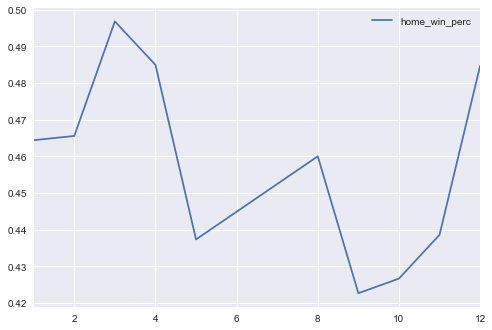

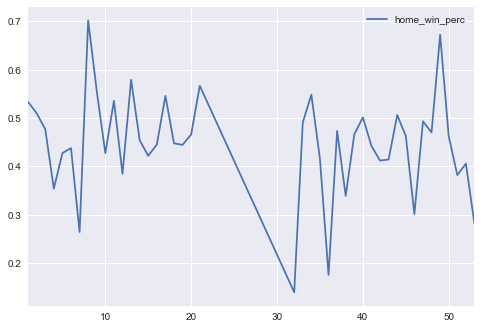

In [70]:
fig1,ax1=plt.subplots()
fig2,ax2=plt.subplots()
average_year_by_month.plot(ax=ax1)
average_year_by_week.plot(ax=ax2)
plt.show()

## Game day by game day

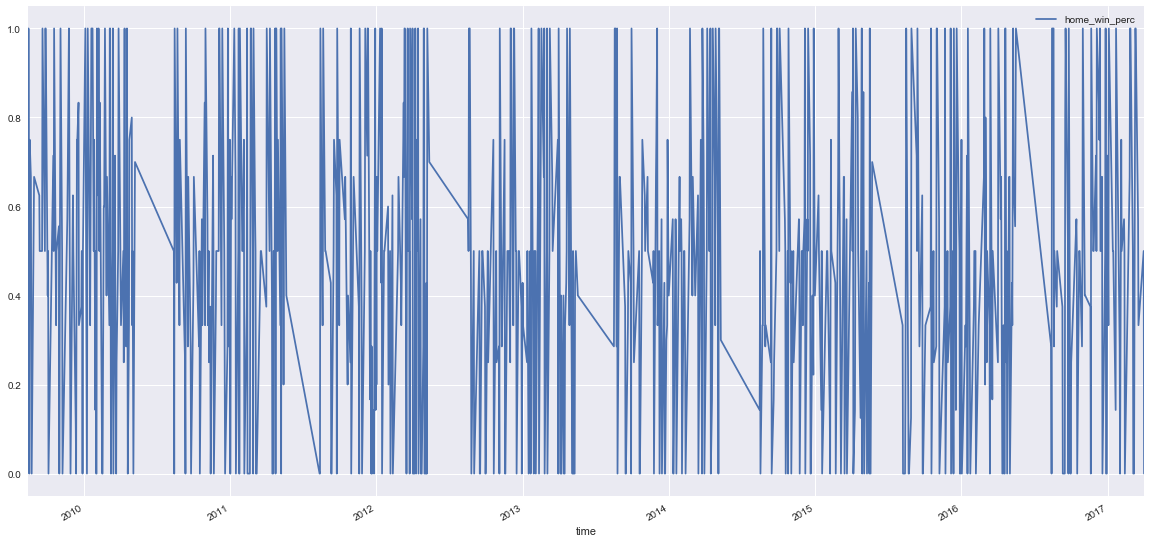

In [71]:
fig,ax=plt.subplots(figsize=(20,10))
perc_home_win_vs_time_df.plot(ax=ax)
plt.show()

## Week by week

In [72]:
week_by_week=perc_home_win_vs_time_df.resample('W', how='mean')

/Users/auguste/Documents/fibronostics_code/Envs/machine_learning/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


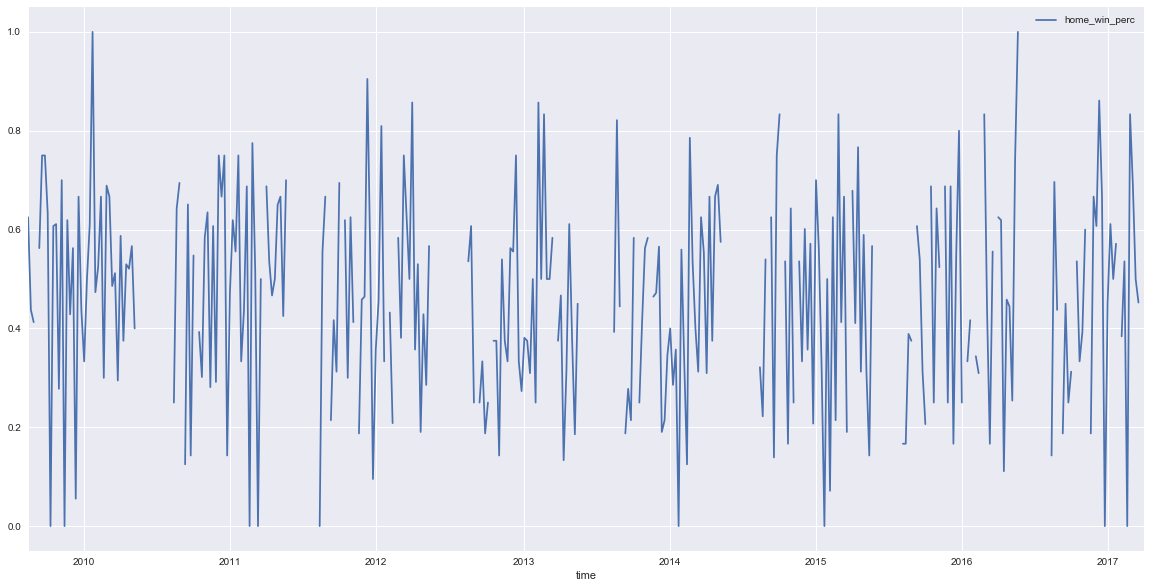

In [73]:
fig,ax=plt.subplots(figsize=(20,10))
week_by_week.plot(ax=ax)
plt.show()

## Month by Month

In [74]:
month_by_month=perc_home_win_vs_time_df.resample('M', how='mean')

/Users/auguste/Documents/fibronostics_code/Envs/machine_learning/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


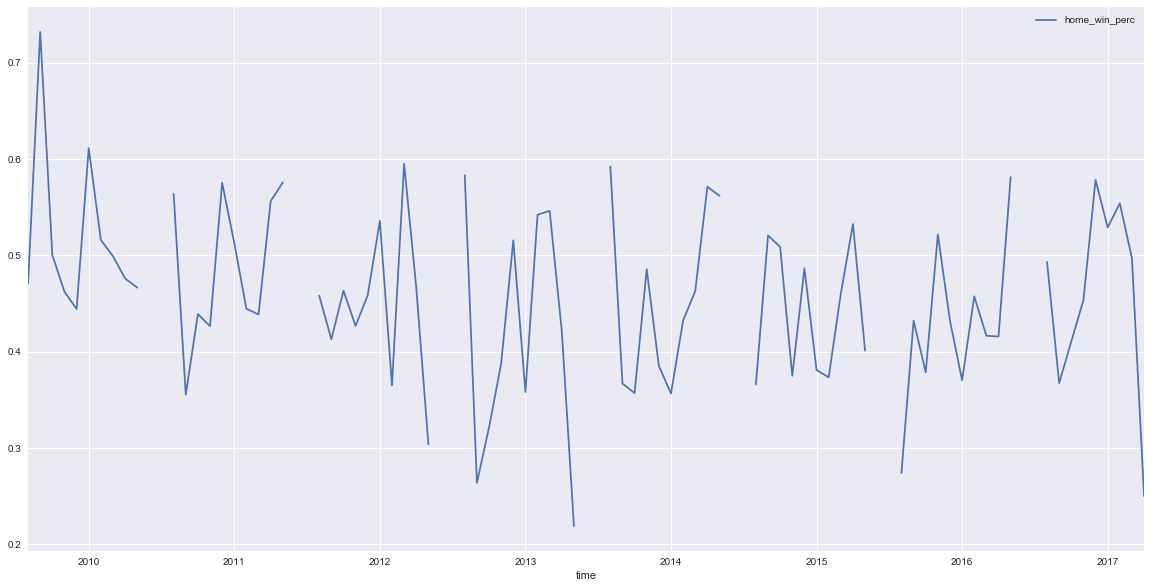

In [75]:
fig,ax=plt.subplots(figsize=(20,10))
month_by_month.plot(ax=ax)
plt.show()

## Quarter by quarter

In [76]:
q_by_q=perc_home_win_vs_time_df.resample('Q', how='mean')

/Users/auguste/Documents/fibronostics_code/Envs/machine_learning/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


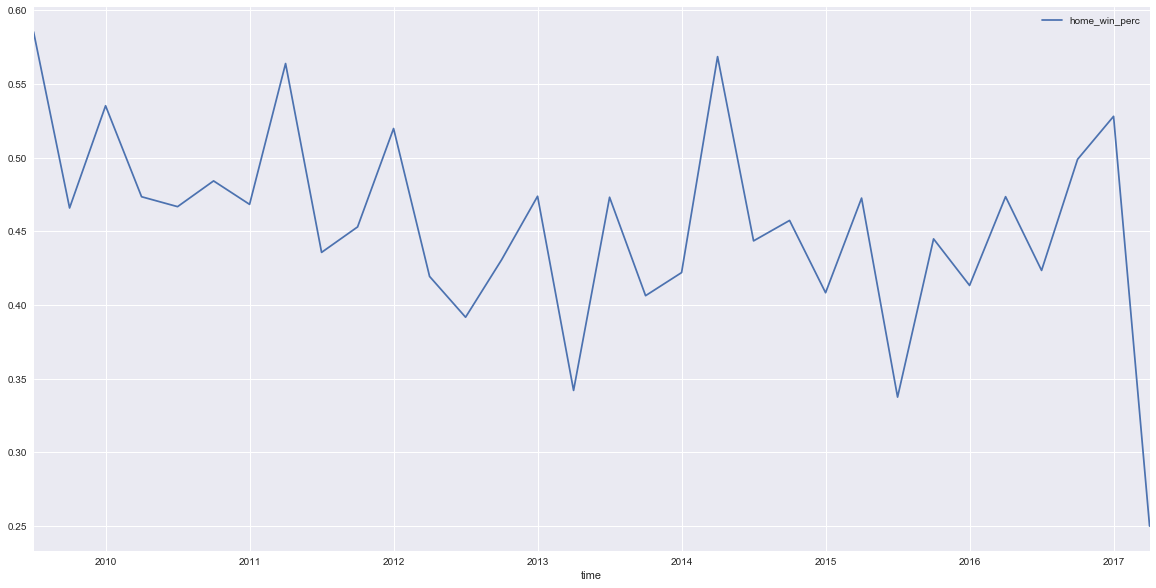

In [77]:
fig,ax=plt.subplots(figsize=(20,10))
q_by_q.plot(ax=ax)
plt.show()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,E0,2009-08-15,Aston Villa,Wigan,0,2,A,0,1,A,...,2.04,1.92,1.91,1.81,21,0.00,1.28,1.22,4.40,3.99
1,E0,2009-08-15,Blackburn,Man City,0,2,A,0,1,A,...,2.15,2.04,1.78,1.71,24,0.00,2.58,2.38,1.60,1.54
2,E0,2009-08-15,Bolton,Sunderland,0,1,A,0,1,A,...,2.25,2.12,1.70,1.66,23,0.00,1.68,1.61,2.33,2.23
3,E0,2009-08-15,Chelsea,Hull,2,1,H,1,1,D,...,1.67,1.58,2.44,2.26,22,0.00,1.03,1.02,17.05,12.96
4,E0,2009-08-15,Everton,Arsenal,1,6,A,0,3,A,...,2.20,2.06,1.77,1.70,24,0.00,2.27,2.20,1.73,1.63
5,E0,2009-08-15,Portsmouth,Fulham,0,1,A,0,1,A,...,2.28,2.12,1.70,1.65,23,0.00,1.98,1.83,2.05,1.95
6,E0,2009-08-15,Stoke,Burnley,2,0,H,2,0,H,...,2.25,2.10,1.71,1.67,22,0.00,1.45,1.39,3.05,2.85
7,E0,2009-08-15,Wolves,West Ham,0,2,A,0,1,A,...,2.16,2.03,1.80,1.72,22,0.00,1.95,1.85,2.00,1.92
8,E0,2009-08-16,Man United,Birmingham,1,0,H,1,0,H,...,1.69,1.62,2.35,2.18,20,0.00,1.04,1.02,15.00,11.42
9,E0,2009-08-16,Tottenham,Liverpool,2,1,H,1,0,H,...,2.07,1.95,1.85,1.79,21,0.00,2.38,2.24,1.73,1.61
